<a href="https://colab.research.google.com/github/DanayaDiarra/danaya_data/blob/master/SVC_Model_HyperParamTuning_%26_Training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARAMETERS**

## **🔹 Model Parameters**


These are the values that a machine learning model learns from the training data.

**Purpose:**

They define the model's internal structure and are adjusted during training to minimize error.

**Examples:**

In Linear Regression, the slope (weights) and intercept (bias) are parameters.

In a Neural Network, the weights and biases of the connections between neurons are parameters.

📌 Think of parameters as what the model “learns”.



----------------------------------------------

## **🔸 Hyperparameters**


These are the settings or configurations set before training the model. They are not learned from data but are chosen manually or through optimization.

**Purpose:**

They control the learning process and the structure of the model.

**Examples:**

-Learning rate (how fast the model learns)

-Number of layers in a neural network

-Batch size (how many samples per update)

-Number of trees in a random forest

📌 Think of hyperparameters as the “knobs you turn” before training.



-------------------------------------------

**🎯 Simple Example: Linear Regression**

Suppose we're using Linear Regression to predict house prices:

**Model parameters:**

Weight (e.g., $1000 per square meter)

Bias (e.g., base price of $50,000)
→ These are learned by the model.

Hyperparameters:

Learning rate (e.g., 0.01)

Number of iterations (e.g., 1000)
→ we decide these before training.

# **Hyperparameter Tuning:**

🎯 What is Hyperparameter Tuning?

Hyperparameter tuning is the process of finding the best **settings** (hyperparameters) for our machine learning model to get the highest accuracy or lowest error.

We don’t train the model once —we try many combinations of hyperparameters to see which one works best.


### **⚙️ Two Common Methods**
  **1️⃣ GridSearchCV (Grid Search)**

How it works:

Tries every possible combination of the hyperparameters you give.

Best when we have a small number of options.


**2️⃣ RandomizedSearchCV (Random Search)**

How it works:

Picks a random sample of hyperparameter combinations.

Best when we have a large search space and want to save time.


--------------------------------------

In [ ]:
# Dependances
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


**Importing the Dataset**

In [ ]:
#Breast Cancer Dataset
dataf = sklearn.datasets.load_breast_cancer()
print(dataf)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

## **Statistics**

In [ ]:
# Transforming the dataset to pd Df
data = pd.DataFrame(dataf.data, columns= dataf.feature_names)

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Adding the Target column to the Df
data['label'] = dataf.target

In [ ]:
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data.shape

(569, 31)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data.isna().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
# Checking the Distribution of the Target Variable
data['label'].value_counts()

,count
label,
1,357
0,212


1==> Benign

0==> MAlignant

### **Splitting the Data in (features and target)**

In [ ]:
X = data.drop(columns='label', axis= 1)
Y = data['label']

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


### **Converting the DF to numpy array**

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

# **GridSearchCV**

In [ ]:
# CASE: SVC (Support Vector Classifier)
#Loading the SVC model
model = SVC()

In [ ]:
# Hyperparameters
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [1, 5, 10, 20]
}

In [ ]:
# Grid Search
classifier = GridSearchCV(model, params, cv= 5)

In [ ]:
# Fitting the Data to the model
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# Printing the CV result
classifier.cv_results_

{'mean_fit_time': array([1.65807366e+00, 3.70445251e-03, 4.38489914e-03, 1.42010689e-02,
        3.16362114e+00, 3.67197990e-03, 4.08935547e-03, 1.33797646e-02,
        6.09649105e+00, 6.47358894e-03, 5.81746101e-03, 1.93119526e-02,
        7.90681820e+00, 7.30195045e-03, 6.58302307e-03, 3.04439068e-02]),
 'std_fit_time': array([9.76258457e-01, 9.18411886e-05, 8.83541554e-05, 3.67959747e-04,
        8.29608239e-01, 2.67858179e-04, 3.14870419e-04, 6.71592364e-04,
        2.76036548e+00, 1.25939040e-04, 1.57720866e-04, 1.02732857e-03,
        1.96007648e+00, 2.61935449e-04, 2.78655672e-04, 9.04257702e-03]),
 'mean_score_time': array([0.00155044, 0.00139632, 0.00180993, 0.00392737, 0.00122085,
        0.00119815, 0.00179729, 0.00341001, 0.0012948 , 0.00174417,
        0.00235648, 0.0048274 , 0.00145721, 0.00189428, 0.0030982 ,
        0.00517521]),
 'std_score_time': array([4.64204219e-04, 1.90144376e-04, 2.74823722e-05, 3.46781822e-04,
        3.42781249e-05, 3.70946211e-05, 3.90550085e-

In [ ]:
# Printing the Best Parameters
best_parameters = classifier.best_estimator_

In [ ]:
print(best_parameters)

SVC(C=10, kernel='linear')


In [ ]:
# Highest Accuracy
h_accuracy = classifier.best_score_
print(h_accuracy)

0.9525694767893185


In [ ]:
# Loading the CV result to Pandas DF
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.658074,0.976258,0.001550,0.000464,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003704,0.000092,0.001396,0.000190,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004385,0.000088,0.001810,0.000027,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.014201,0.000368,0.003927,0.000347,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.163621,0.829608,0.001221,0.000034,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [ ]:
gridSearch_result = result[['param_C', 'param_kernel', 'mean_test_score' ]]
gridSearch_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


# **RandomizedGridSearchCV**

In [ ]:
# Loading the model
model = SVC()

In [ ]:
# Hyperparameters
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [1, 5, 10, 20]
}

In [ ]:
# Randomized Grid Search
classifier = RandomizedSearchCV(model, params, cv= 5)

In [ ]:
# Fitting the Data to the model
classifier.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
# Printing the CV result
classifier.cv_results_

{'mean_fit_time': array([5.25109429e+00, 3.63740921e-03, 3.87530327e-03, 3.76443863e-03,
        1.44588947e-02, 3.88207436e-03, 3.76358032e-03, 1.33634090e-02,
        1.30889416e-02, 3.06669207e+00]),
 'std_fit_time': array([1.48345160e+00, 2.64895020e-04, 1.20820167e-04, 1.19961123e-04,
        2.55557962e-03, 1.64779951e-04, 6.28135827e-04, 7.41065994e-04,
        5.00012795e-04, 5.89392275e-01]),
 'mean_score_time': array([0.00154924, 0.00117512, 0.00114379, 0.00149951, 0.00406737,
        0.00162702, 0.00122075, 0.00336747, 0.00336404, 0.00138035]),
 'std_score_time': array([6.19589165e-04, 1.66554789e-05, 1.39058339e-05, 3.66680024e-05,
        9.33955897e-04, 1.03481727e-04, 6.73152217e-05, 1.01616829e-04,
        6.74346879e-05, 2.74316116e-04]),
 'param_kernel': masked_array(data=['linear', 'poly', 'poly', 'rbf', 'sigmoid', 'rbf',
                    'poly', 'sigmoid', 'sigmoid', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
          

In [ ]:
# Printing the Best Parameters
best_parameters = classifier.best_estimator_
print(best_parameters)

SVC(C=10, kernel='linear')


In [ ]:
# Highest Accuracy
h_accuracy = classifier.best_score_
print(h_accuracy)

0.9525694767893185


In [ ]:
# Loading the CV result to Pandas DF
result = pd.DataFrame(classifier.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.251094,1.483452,0.001549,0.000620,linear,10,"{'kernel': 'linear', 'C': 10}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1
1,0.003637,0.000265,0.001175,0.000017,poly,5,"{'kernel': 'poly', 'C': 5}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,4
2,0.003875,0.000121,0.001144,0.000014,poly,10,"{'kernel': 'poly', 'C': 10}",0.885965,0.921053,0.903509,0.938596,0.955752,0.920975,0.024701,6
3,0.003764,0.000120,0.001500,0.000037,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.877193,0.921053,0.912281,0.956140,0.946903,0.922714,0.027879,5
4,0.014459,0.002556,0.004067,0.000934,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.473684,0.403509,0.421053,0.342105,0.353982,0.398867,0.047640,10


In [ ]:
RandomizedSearch_result = result[['param_C', 'param_kernel', 'mean_test_score' ]]
RandomizedSearch_result

,param_C,param_kernel,mean_test_score
0,10,linear,0.952569
1,5,poly,0.922729
2,10,poly,0.920975
3,10,rbf,0.922714
4,20,sigmoid,0.398867
5,5,rbf,0.931501
6,1,poly,0.908663
7,10,sigmoid,0.402391
8,5,sigmoid,0.411178
9,5,linear,0.950815


### **As Conclusion:**
For this breast Cancer Dataset, in order to get the highest "Accuracy Score" with SVC model,

we need:

**Best Params = (C=10, kernel='linear')**

Then:

**Highest_Accuracy_Score = 95.2%**



# **Model Training**

In [ ]:
# Train_test_split
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

In [ ]:
# Setting the parmeters
model = SVC(C= 10, kernel= "linear")

In [ ]:
#Fitting the Model
model.fit(X_train, Y_train)

SVC(C=10, kernel='linear')

In [ ]:
#Prediction
prediction = model.predict(X_test)

In [ ]:
print(prediction)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


## **Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



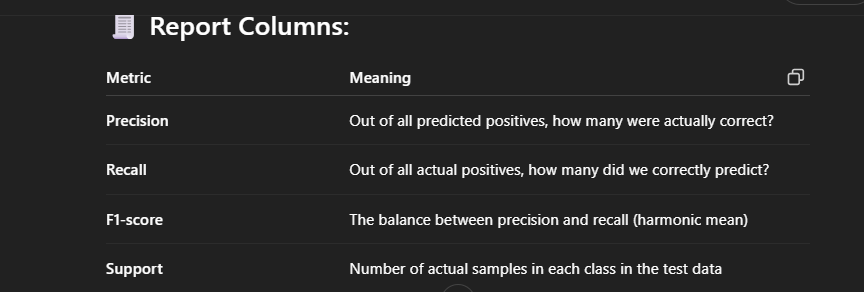


## **🔹 Class 0:**
## Precision = 0.97   
97% of the time, when the model predicted class 0, it was correct.

## Recall = 0.91:
It correctly identified 91% of all real class 0s.

## F1-score = 0.94:
A good balance between precision and recall.

## Support = 43:
There were 43 actual class 0 examples in the test set.

## **🔸 Class 1:**
## Precision = 0.95:
95% of the predicted class 1s were correct.

## Recall = 0.99:
It found almost all real class 1s (99% recall).

## F1-score = 0.97:
Strong overall performance.

## Support = 71:
There were 71 actual class 1 examples.

# **📊 Overall Scores:**
## ✅ Accuracy = 0.96
The model was correct 96% of the time overall (out of 114 samples).




##✅ Summary:
The model is performing very well overall (96% accuracy), especially on class 1 (higher recall), and has a balanced performance across both classes.